In [1]:
import pandas as pd

# Define a small sample dataset (10 rows)
data = {
    "ID": ["A-1", "A-2", "A-3", "A-4", "A-5", "A-6", "A-7", "A-8", "A-9", "A-10"],
    "Severity": [2, 3, 2, 4, 3, 2, 2, 1, 3, 4],
    "Start_Time": [
        "2023-01-01 08:00", "2023-01-01 17:00", "2023-01-02 22:30", "2023-01-03 06:45",
        "2023-01-04 12:10", "2023-01-05 15:30", "2023-01-06 19:00", "2023-01-07 09:15",
        "2023-01-08 11:45", "2023-01-09 13:00"
    ],
    "City": ["Los Angeles", "New York", "Chicago", "Houston", "Phoenix",
             "San Diego", "Dallas", "San Jose", "Austin", "Jacksonville"],
    "State": ["CA", "NY", "IL", "TX", "AZ", "CA", "TX", "CA", "TX", "FL"],
    "Weather_Condition": ["Clear", "Rain", "Snow", "Fog", "Clear",
                          "Rain", "Clear", "Fog", "Rain", "Snow"],
    "Start_Lat": [34.05, 40.71, 41.88, 29.76, 33.45, 32.72, 32.77, 37.33, 30.27, 30.33],
    "Start_Lng": [-118.24, -74.01, -87.63, -95.36, -112.07, -117.16, -96.79, -121.88, -97.74, -81.65]
}

# Create DataFrame
sample_df = pd.DataFrame(data)

# Convert 'Start_Time' to datetime
sample_df["Start_Time"] = pd.to_datetime(sample_df["Start_Time"])

# Save to CSV if needed
sample_df.to_csv("sample_us_accidents.csv", index=False)

# Show sample
sample_df


,ID,Severity,Start_Time,City,State,Weather_Condition,Start_Lat,Start_Lng
0,A-1,2,2023-01-01 08:00:00,Los Angeles,CA,Clear,34.05,-118.24
1,A-2,3,2023-01-01 17:00:00,New York,NY,Rain,40.71,-74.01
2,A-3,2,2023-01-02 22:30:00,Chicago,IL,Snow,41.88,-87.63
3,A-4,4,2023-01-03 06:45:00,Houston,TX,Fog,29.76,-95.36
4,A-5,3,2023-01-04 12:10:00,Phoenix,AZ,Clear,33.45,-112.07
5,A-6,2,2023-01-05 15:30:00,San Diego,CA,Rain,32.72,-117.16
6,A-7,2,2023-01-06 19:00:00,Dallas,TX,Clear,32.77,-96.79
7,A-8,1,2023-01-07 09:15:00,San Jose,CA,Fog,37.33,-121.88
8,A-9,3,2023-01-08 11:45:00,Austin,TX,Rain,30.27,-97.74
9,A-10,4,2023-01-09 13:00:00,Jacksonville,FL,Snow,30.33,-81.65


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# If you've just created it with `to_csv`, you can load it like this:
df = pd.read_csv("sample_us_accidents.csv")

# Convert Start_Time to datetime if not already
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

# Preview
df.head()


,ID,Severity,Start_Time,City,State,Weather_Condition,Start_Lat,Start_Lng
0,A-1,2,2023-01-01 08:00:00,Los Angeles,CA,Clear,34.05,-118.24
1,A-2,3,2023-01-01 17:00:00,New York,NY,Rain,40.71,-74.01
2,A-3,2,2023-01-02 22:30:00,Chicago,IL,Snow,41.88,-87.63
3,A-4,4,2023-01-03 06:45:00,Houston,TX,Fog,29.76,-95.36
4,A-5,3,2023-01-04 12:10:00,Phoenix,AZ,Clear,33.45,-112.07


/tmp/ipython-input-4-1604871416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Hour", data=df, palette="viridis")


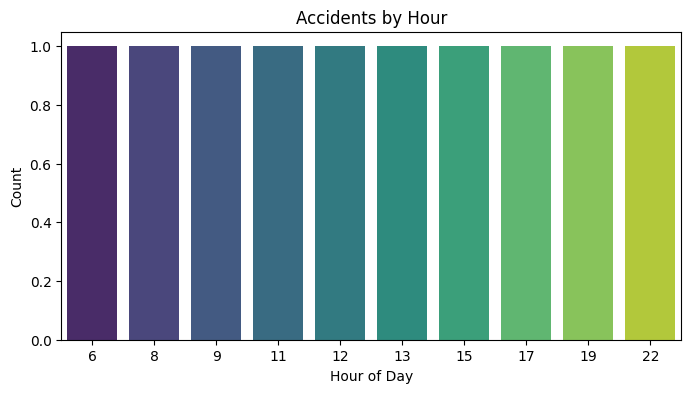

In [4]:
df["Hour"] = df["Start_Time"].dt.hour

plt.figure(figsize=(8, 4))
sns.countplot(x="Hour", data=df, palette="viridis")
plt.title("Accidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-5-1642081481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Weather_Condition", data=df, order=df['Weather_Condition'].value_counts().index, palette="mako")


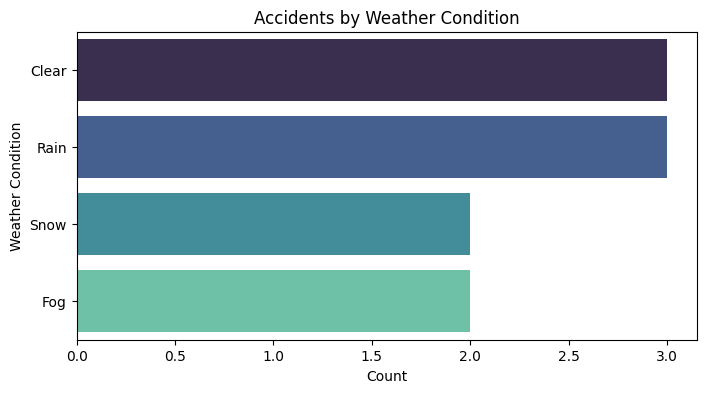

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(y="Weather_Condition", data=df, order=df['Weather_Condition'].value_counts().index, palette="mako")
plt.title("Accidents by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()


/tmp/ipython-input-6-1176542827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="City", data=df, order=df['City'].value_counts().index, palette="rocket")


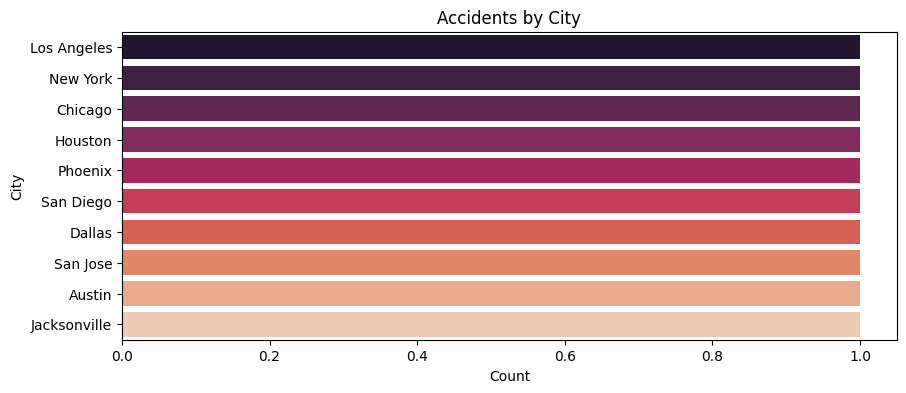

In [6]:
plt.figure(figsize=(10, 4))
sns.countplot(y="City", data=df, order=df['City'].value_counts().index, palette="rocket")
plt.title("Accidents by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()


In [7]:
!pip install folium --quiet
import folium

m = folium.Map(location=[df["Start_Lat"].mean(), df["Start_Lng"].mean()], zoom_start=5)

for i in range(len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]["Start_Lat"], df.iloc[i]["Start_Lng"]],
        radius=4,
        color="red",
        fill=True
    ).add_to(m)

m
